###  Stacked Line

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

In [8]:
ca_housing_pivot= ca_housing.pivot_table(index="period_begin",
                                        columns = "region_name",
                                        values= "inventory").assign( #changed to inventory
                                        CA_average= lambda x: x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,1086.0,7.0,115.0,446.0,8.0,13.0,1156.0,598.0,1518.0,73.0,...,912.0,3.0,82.0,6.0,31.0,2.0,1461.0,234.0,9.0,1259.851852
2017-01-09,1109.0,7.0,116.0,448.0,7.0,12.0,1178.0,602.0,1521.0,74.0,...,909.0,3.0,82.0,6.0,30.0,2.0,1457.0,237.0,8.0,1268.888889
2017-01-16,1131.0,7.0,118.0,453.0,7.0,11.0,1203.0,613.0,1527.0,75.0,...,903.0,3.0,83.0,7.0,30.0,2.0,1457.0,239.0,8.0,1278.481481
2017-01-23,1145.0,7.0,120.0,459.0,7.0,11.0,1225.0,624.0,1535.0,76.0,...,898.0,3.0,84.0,7.0,30.0,2.0,1454.0,243.0,8.0,1287.129630
2017-01-30,1172.0,7.0,122.0,465.0,7.0,10.0,1258.0,638.0,1543.0,76.0,...,898.0,3.0,85.0,7.0,29.0,2.0,1456.0,247.0,8.0,1298.148148


In [9]:
ca_housing_markets= ca_housing_pivot.loc[:, [
                                            "Los Angeles",
                                            "San Diego",
                                            "San Francisco",
                                            "CA_average"]]
ca_housing_markets.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,15492.0,5468.0,626.0,1259.851852
2017-01-09,15605.0,5493.0,652.0,1268.888889
2017-01-16,15724.0,5520.0,673.0,1278.481481
2017-01-23,15834.0,5546.0,685.0,1287.129630
2017-01-30,15972.0,5581.0,697.0,1298.148148


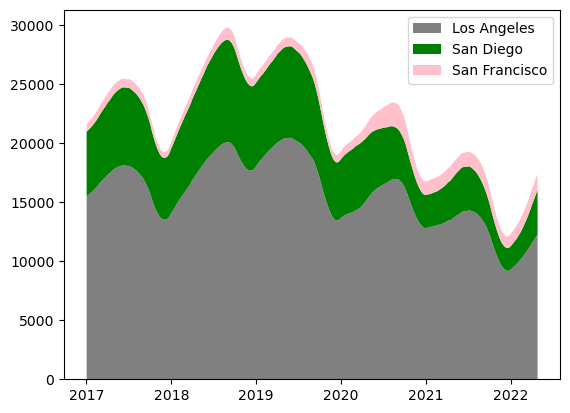

In [11]:
fig, ax = plt.subplots()

#labels= ca_housing_markets.columns
colors=["grey", "green","pink"]

ax.stackplot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"],
    ca_housing_markets["San Diego"],
    ca_housing_markets["San Francisco"],
#    labels=labels,
    colors=colors
)

ax.legend(ca_housing_markets.columns)